In [5]:
import importlib
import models
importlib.reload(models)
from models import Model, TafelData
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
filepath = r"Cell-A-Tafel.csv"
data_A = TafelData(filepath)
data_A = data_A.load_and_process()

filepath = r"Cell-B-Tafel.csv"
data_B = TafelData(filepath)
data_B = data_B.load_and_process()

filepath = r"Cell-C-Tafel.csv"
data_C = TafelData(filepath)
data_C = data_C.load_and_process()

eta = data_A.eta 

MHC2_13.5 on Cell A: RMSE=0.7164, MAE=0.6071 (n=34/37 points)
MHC2_13.5 on Cell B: RMSE=0.6618, MAE=0.5631 (n=38/40 points)
MHC2_13.5 on Cell C: RMSE=0.6846, MAE=0.5766 (n=33/35 points)
MHC_13.5 on Cell A: RMSE=0.6846, MAE=0.5766 (n=33/37 points)
MHC_13.5 on Cell A: RMSE=0.6846, MAE=0.5766
MHC_13.5 on Cell B: RMSE=0.6846, MAE=0.5766 (n=33/40 points)
MHC_13.5 on Cell B: RMSE=0.6846, MAE=0.5766
MHC_13.5 on Cell C: RMSE=0.6846, MAE=0.5766 (n=33/35 points)
MHC_13.5 on Cell C: RMSE=0.6846, MAE=0.5766


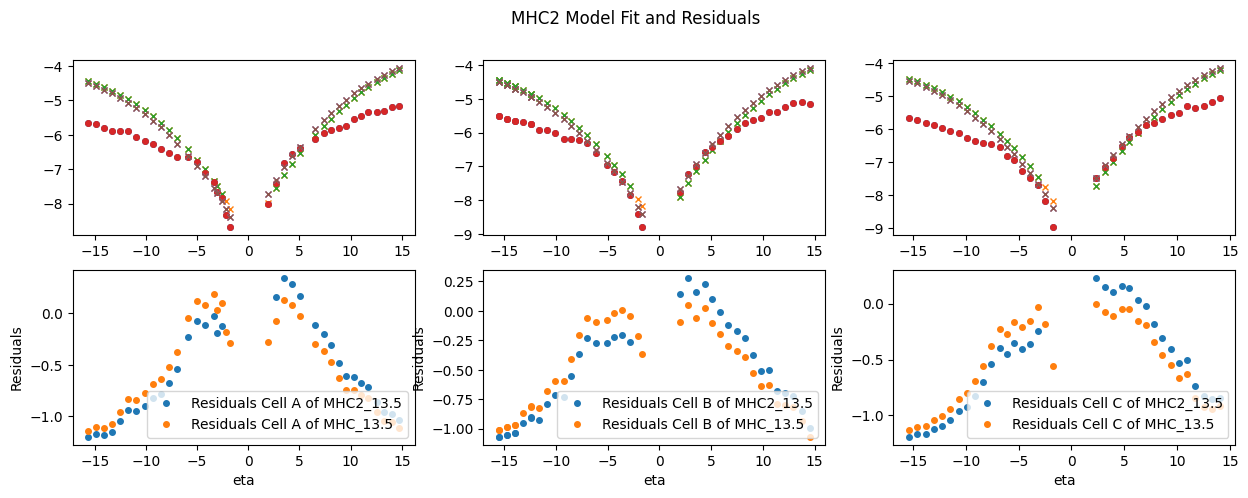

In [7]:
# Define the datasets
datasets = {
    'Cell A': data_A,
    'Cell B': data_B, 
    'Cell C': data_C
}

# Calculate errors for each model-dataset combination
results = {}

plt.figure(figsize=(15,5))
plt.suptitle('MHC2 Model Fit and Residuals')

for dataset_name, dataset in datasets.items():
    MHC2_paper_13_5 = Model(model = 'MHC2', k01=2.093e-4, k02=2.093e-4, lambda_=13.5, eta=dataset.eta, C=0.5772, origin_eta=True)
    eta_model, lnk_model = MHC2_paper_13_5.ln_k()
        # Interpolate model predictions to experimental data points
    lnk_pred = np.interp(dataset.eta, eta_model, lnk_model)
    model_name = 'MHC2_13.5'

     # Calculate errors with mask to exclude ln(k) < -8
    mask = dataset.lnk >= -8  # Only include data points where ln(k) >= -8
    residuals = dataset.lnk - lnk_model
    masked_residuals = residuals[mask]

    plt.subplot(2, 3, list(datasets.keys()).index(dataset_name) + 1)
    plt.plot( dataset.eta, dataset.lnk, 'o', label=f'Experimental {dataset_name}', markersize=4)
    plt.plot( eta_model, lnk_model, 'x', label=f'{model_name} on {dataset_name}', markersize=4)
    plt.plot( dataset.eta[mask], lnk_pred[mask], 'x', label=f'Interp {model_name} on {dataset_name}', markersize=4)

    plt.subplot(2, 3, list(datasets.keys()).index(dataset_name) + 4) # plot residuals against eta
    plt.plot(dataset.eta[mask], residuals[mask], 'o', label=f'Residuals {dataset_name} of {model_name}', markersize=4)
    plt.xlabel('eta')
    plt.ylabel('Residuals')
    plt.legend()


    rmse = np.sqrt(np.mean(masked_residuals**2))
    mae = np.mean(np.abs(masked_residuals))
    print(f"{model_name} on {dataset_name}: RMSE={rmse:.4f}, MAE={mae:.4f} (n={len(masked_residuals)}/{len(residuals)} points)")

    


# Calculate errors for each model-dataset combination
results = {}


for dataset_name, dataset in datasets.items():
    MHC_paper_13_5 = Model(model = 'MHC', k01=1.208e-4, k02=2.093e-4, lambda_=13.5, eta=dataset.eta, origin_eta=True)
    eta_model, lnk_model = MHC_paper_13_5.ln_k()
        # Interpolate model predictions to experimental data points
    lnk_pred = np.interp(dataset.eta, eta_model, lnk_model)
    model_name = 'MHC_13.5'

    residuals = dataset.lnk - lnk_model


    plt.subplot(2, 3, list(datasets.keys()).index(dataset_name) + 1)
    plt.plot( dataset.eta, dataset.lnk, 'o', label=f'Experimental {dataset_name}', markersize=4)
    plt.plot( eta_model, lnk_model, 'x', label=f'{model_name} on {dataset_name}', markersize=4)
    plt.plot( dataset.eta, lnk_pred, 'x', label=f'Interp {model_name} on {dataset_name}', markersize=4)

    plt.subplot(2, 3, list(datasets.keys()).index(dataset_name) + 4) # plot residuals against eta
    plt.plot(dataset.eta, residuals, 'o', label=f'Residuals {dataset_name} of {model_name}', markersize=4)
    plt.xlabel('eta')
    plt.ylabel('Residuals')
    plt.legend()
        
    rmse = np.sqrt(np.mean(masked_residuals**2))
    mae = np.mean(np.abs(masked_residuals))
    print(f"{model_name} on {dataset_name}: RMSE={rmse:.4f}, MAE={mae:.4f} (n={len(masked_residuals)}/{len(residuals)} points)")
        
    print(f"{model_name} on {dataset_name}: RMSE={rmse:.4f}, MAE={mae:.4f}")


MHC2_8.3 on Cell A: RMSE=0.2262, MAE=0.1873
MHC2_8.3 on Cell B: RMSE=0.1718, MAE=0.1219
MHC2_8.3 on Cell C: RMSE=0.2612, MAE=0.2137


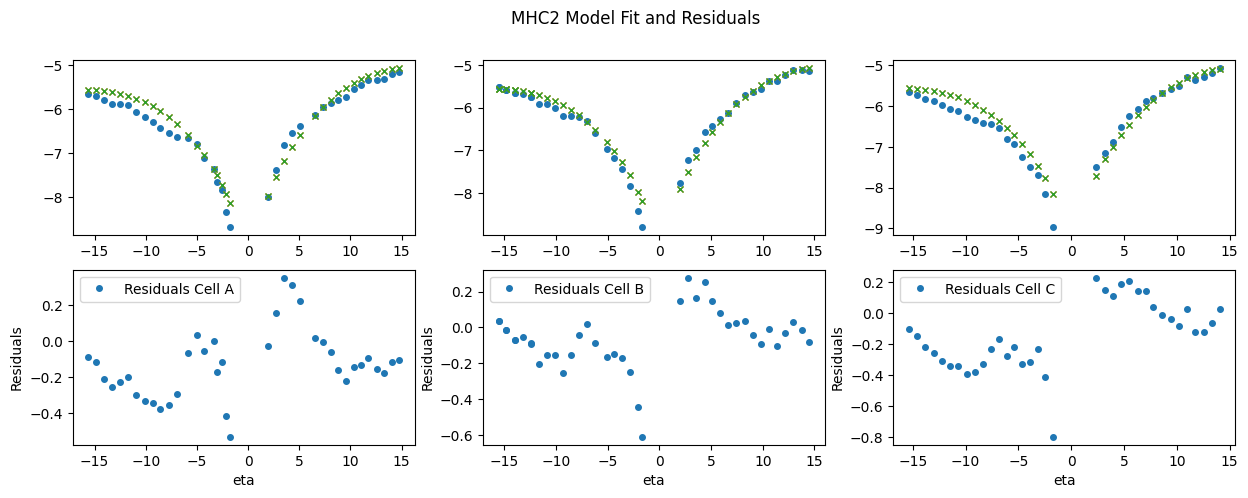

MHC_8.3 on Cell A: RMSE=0.1828, MAE=0.1692 (n=34/37 points)
MHC_8.3 on Cell B: RMSE=0.0850, MAE=0.0705 (n=38/40 points)
MHC_8.3 on Cell C: RMSE=0.1573, MAE=0.1262 (n=33/35 points)


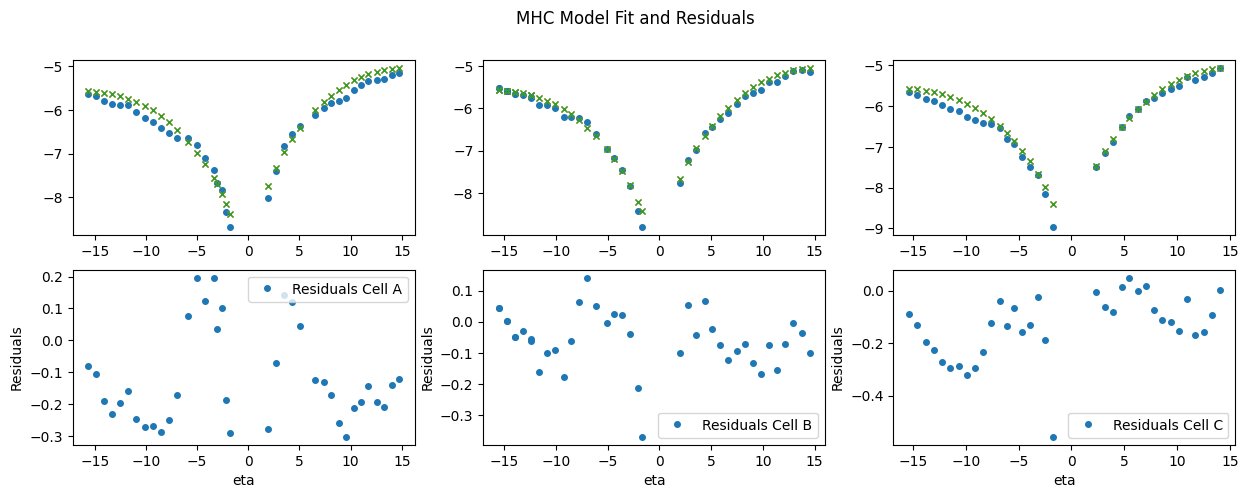

In [8]:
# Define the datasets
datasets = {
    'Cell A': data_A,
    'Cell B': data_B, 
    'Cell C': data_C
}

# Calculate errors for each model-dataset combination
results = {}

plt.figure(figsize=(15,5))
plt.suptitle('MHC2 Model Fit and Residuals')

for dataset_name, dataset in datasets.items():
    MHC2_paper_8_3 = Model(model = 'MHC2', k01=2.062e-4, k02=2.062e-4, lambda_=8.3, eta=dataset.eta, C=0.5771, origin_eta=True)
    eta_model, lnk_model = MHC2_paper_8_3.ln_k()
        # Interpolate model predictions to experimental data points
    lnk_pred = np.interp(dataset.eta, eta_model, lnk_model)
    model_name = 'MHC2_8.3'
    plt.subplot(2, 3, list(datasets.keys()).index(dataset_name) + 1)
    plt.plot( dataset.eta, dataset.lnk, 'o', label=f'Experimental {dataset_name}', markersize=4)
    plt.plot( eta_model, lnk_model, 'x', label=f'{model_name} on {dataset_name}', markersize=4)
    plt.plot( dataset.eta, lnk_pred, 'x', label=f'Interp {model_name} on {dataset_name}', markersize=4)

    plt.subplot(2, 3, list(datasets.keys()).index(dataset_name) + 4) # plot residuals against eta
    plt.plot(dataset.eta, dataset.lnk - lnk_pred, 'o', label=f'Residuals {dataset_name}', markersize=4)
    plt.xlabel('eta')
    plt.ylabel('Residuals')
    plt.legend()
        
     # Calculate errors
    residuals = dataset.lnk - lnk_model
    rmse = np.sqrt(np.mean(residuals**2))
    mae = np.mean(np.abs(residuals))
        
    print(f"{model_name} on {dataset_name}: RMSE={rmse:.4f}, MAE={mae:.4f}")
    

plt.show()

# Define the datasets
datasets = {
    'Cell A': data_A,
    'Cell B': data_B, 
    'Cell C': data_C
}

# Calculate errors for each model-dataset combination
results = {}

plt.figure(figsize=(15,5))
plt.suptitle('MHC Model Fit and Residuals')

for dataset_name, dataset in datasets.items():
    MHC_paper_8_3 = Model(model = 'MHC', k01=1.190e-4, k02=2.062e-4, lambda_=8.3, eta=dataset.eta, origin_eta=True)  
    eta_model, lnk_model = MHC_paper_8_3.ln_k()
        # Interpolate model predictions to experimental data points
    lnk_pred = np.interp(dataset.eta, eta_model, lnk_model)
    model_name = 'MHC_8.3'
    plt.subplot(2, 3, list(datasets.keys()).index(dataset_name) + 1)
    plt.plot( dataset.eta, dataset.lnk, 'o', label=f'Experimental {dataset_name}', markersize=4)
    plt.plot( eta_model, lnk_model, 'x', label=f'{model_name} on {dataset_name}', markersize=4)
    plt.plot( dataset.eta, lnk_pred, 'x', label=f'Interp {model_name} on {dataset_name}', markersize=4)

    plt.subplot(2, 3, list(datasets.keys()).index(dataset_name) + 4) # plot residuals against eta
    plt.plot(dataset.eta, dataset.lnk - lnk_pred, 'o', label=f'Residuals {dataset_name}', markersize=4)
    plt.xlabel('eta')
    plt.ylabel('Residuals')
    plt.legend()
        
     # Calculate errors with mask to exclude ln(k) < -8
    mask = dataset.lnk >= -8  # Only include data points where ln(k) >= -8
    residuals = dataset.lnk - lnk_model
    masked_residuals = residuals[mask]
    
    if len(masked_residuals) > 0:
        rmse = np.sqrt(np.mean(masked_residuals**2))
        mae = np.mean(np.abs(masked_residuals))
        print(f"{model_name} on {dataset_name}: RMSE={rmse:.4f}, MAE={mae:.4f} (n={len(masked_residuals)}/{len(residuals)} points)")
    else:
        print(f"{model_name} on {dataset_name}: No valid data points with ln(k) >= -8")
